### Goal:
Exploratory Data Analysis of dataset & Prediction of the sales price for each house. 
### About Dataset:
The training dataset consists of approximately 1400 house's sells price & features of house.
### Solution Steps:
---
    1) Import The Libraries & Load Data Set
       
    2) Handle Missing values for each feature
       
    3) Handling the Different type of feature- Categorical, Numerical
     
    4) Fit Model & Evaluate the performance
---
       
       

#### !!update notebook , User PCA or delete highly correalted paramters!!

#### 1) Import Libraries & Load DataSet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline
train_data=pd.read_csv("House.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
corr=train_data.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [3]:
del train_data['Id']
train_data.shape

(1460, 80)

#### 2) Handling the missing values

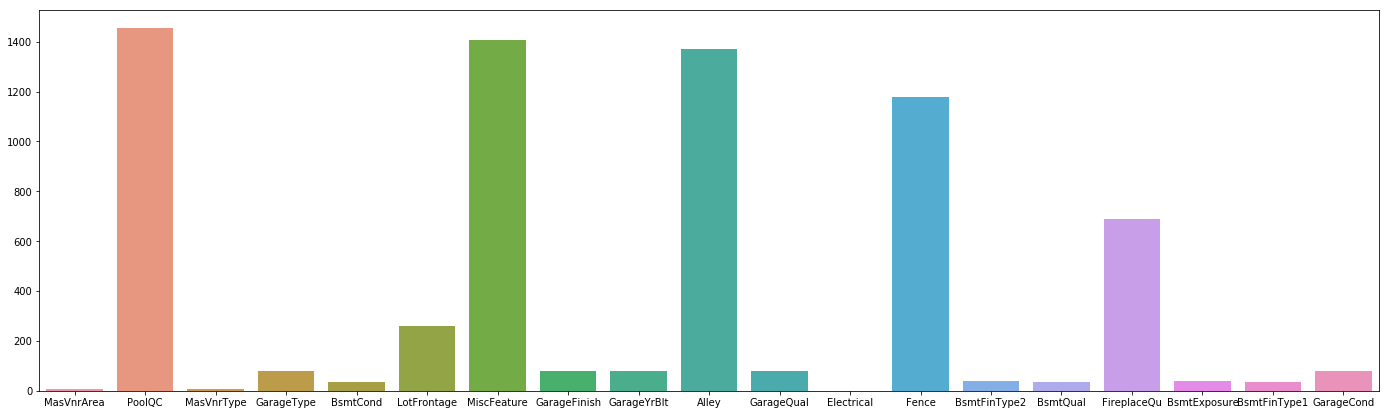

In [4]:
#how many missing values are there in each column:
train_data.columns
mis_info={}
for col in train_data.columns:
    mis_count=len(train_data[train_data[col].isnull()])
    if mis_count!=0:
        mis_info[col]=mis_count
        
x=list(mis_info.keys())
y=list(mis_info.values())

fig, (ax1)=  plt.subplots(1,1,figsize=(24,7))
sns.barplot(x=x,y=y,ax=ax1)
    

##### Lot-Frontage

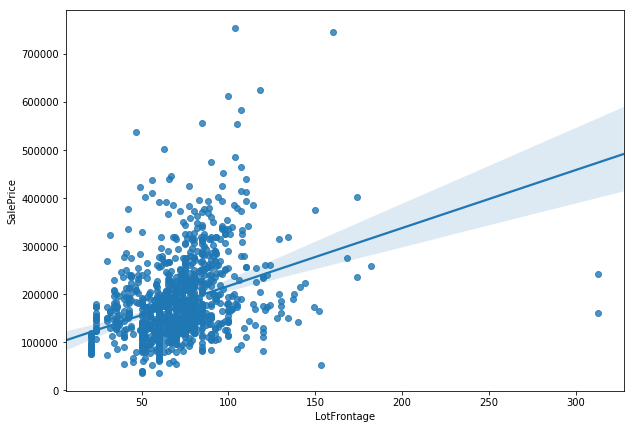

In [5]:
#Let's plot sale price against lot-frontage.
fig, (ax1)=  plt.subplots(1,1,figsize=(10,7))
sns.regplot(x=train_data["LotFrontage"],y=train_data["SalePrice"],ax=ax1)

In [6]:
#here we see that Sales Price has 2 huge outliers. so it won't be a good idea to fill the missing values with mean.median 
#will be a better approach
lot_median=train_data["LotFrontage"].median()
train_data["LotFrontage"]=train_data["LotFrontage"].fillna(lot_median)
print("Number of NAN in LotFrontage Column :",len(train_data[train_data['LotFrontage'].isnull()]))

('Number of NAN in LotFrontage Column :', 0)


##### Alley

('only', 0, 'Percent of Alley have non null values')


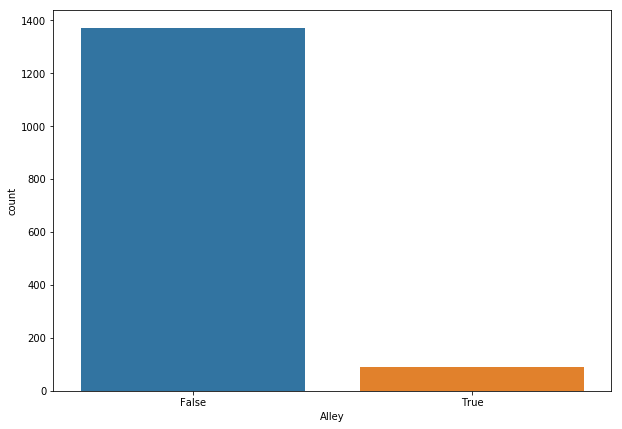

In [7]:
fig, (ax1)=  plt.subplots(1,1,figsize=(10,7))
sns.countplot(train_data['Alley'].notnull(),ax=ax1)
print("only",(len(train_data[train_data["Alley"].notnull()])/len(train_data["Alley"])),"Percent of Alley have non null values")

In [8]:
#this makes alley feature useless. lets delete it
del train_data["Alley"]

##### MasVnrType

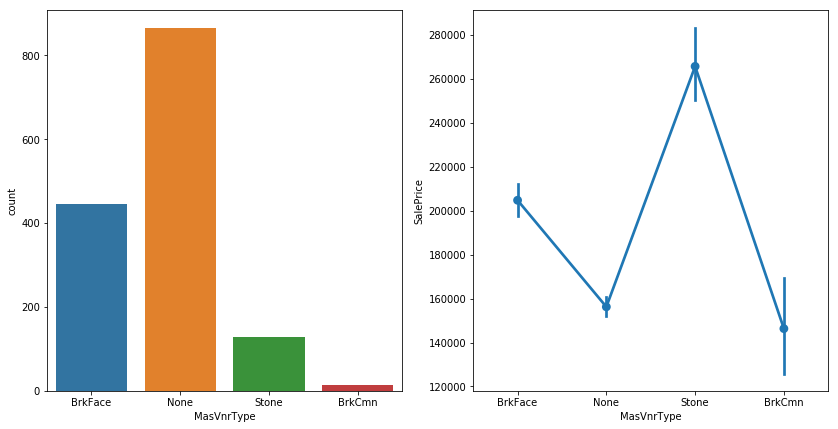

In [9]:
train_data['MasVnrType'].unique()
fig, (ax1,ax2)=  plt.subplots(1,2,figsize=(14,7))
sns.countplot(train_data['MasVnrType'],ax=ax1)
sns.factorplot(x='MasVnrType',y="SalePrice",data=train_data,ax=ax2)
plt.close(2)

MasVnrType is the type of wood layer (decorative fine layer) used. in case of None means no layer is used this means that there is no missing values in this columns. still i am interested in visualizing so graphs for these feature:

In [10]:
# just in case if values are missing fill them with none which means no vaneer
train_data['MasVnrType']=train_data['MasVnrType'].fillna('None')

We can see above that in terms of sale price house with stone vaneer > BrkFace > None > BrkCmn
hmmm!! None is better than Brcmn bit interesting :).
so no deletion from this categorical feature

##### MasVnrArea

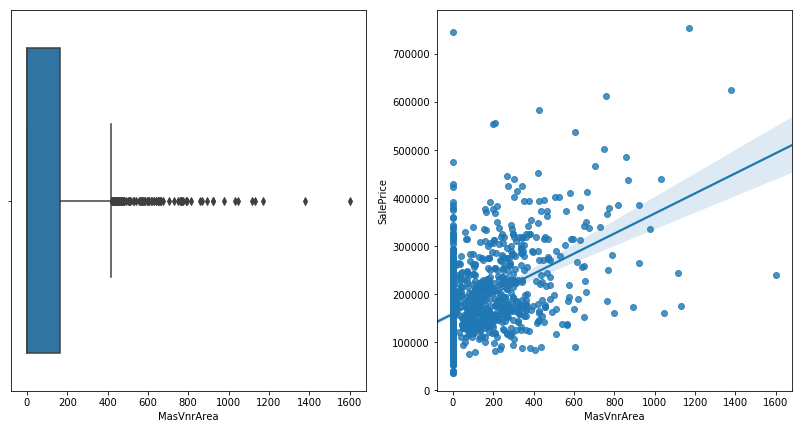

In [11]:
# MasVnrArea this feature also doesn't have any missing values but houses which don't have vaneer this area is 0. Lets see
# the distribution of this feature .
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(14,7))
sns.boxplot(train_data["MasVnrArea"],ax=ax1)
sns.regplot(x=train_data["MasVnrArea"],y=train_data['SalePrice'],ax=ax2)

In [12]:
# in case any NaN are there then fill the VnrArea with 0 , no vaneer no area
train_data["MasVnrArea"]=train_data['MasVnrArea'].fillna(0)

##### BsmtQual, BsmtCond, BsmtExp,BsmtFinTyp,BsmtFinType

In [13]:
# all these Bsmt features are about basement , so if we have NaN is this fields that means those houses don't have basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_data[col] = train_data[col].fillna('None')

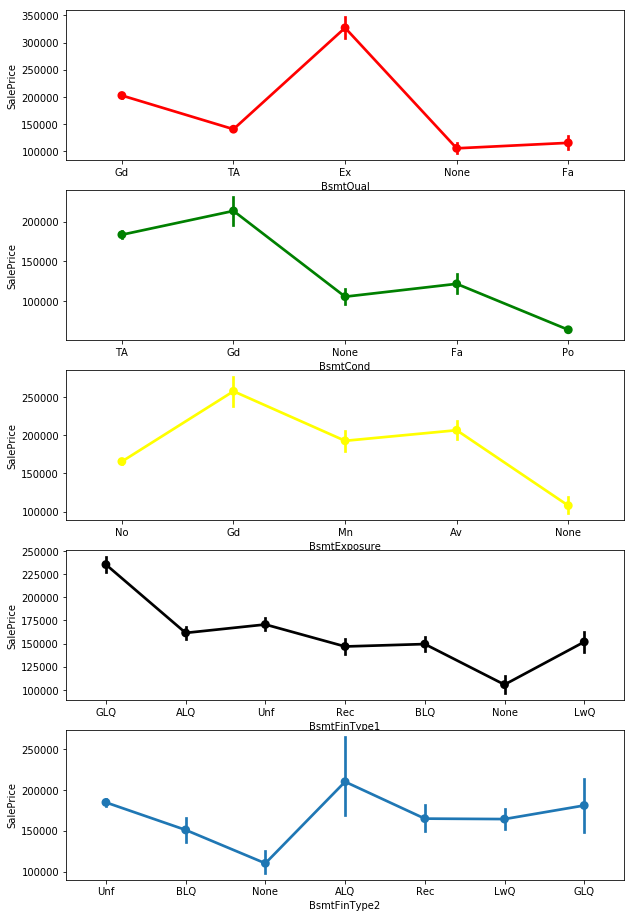

In [14]:
#lets plot factor plot to see how bsmt related features affects the price
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1,figsize=(10,16))
sns.factorplot(x='BsmtQual',y='SalePrice',data=train_data,ax=ax1,color='red')
sns.factorplot(x='BsmtCond',y='SalePrice',data=train_data,ax=ax2,color='green')
sns.factorplot(x='BsmtExposure',y='SalePrice',data=train_data,ax=ax3,color='yellow')
sns.factorplot(x='BsmtFinType1',y='SalePrice',data=train_data,ax=ax4,color='black')
sns.factorplot(x='BsmtFinType2',y='SalePrice',data=train_data,ax=ax5)
plt.close(5)
plt.close(4)
plt.close(3)
plt.close(2)
plt.close()

##### Electrical

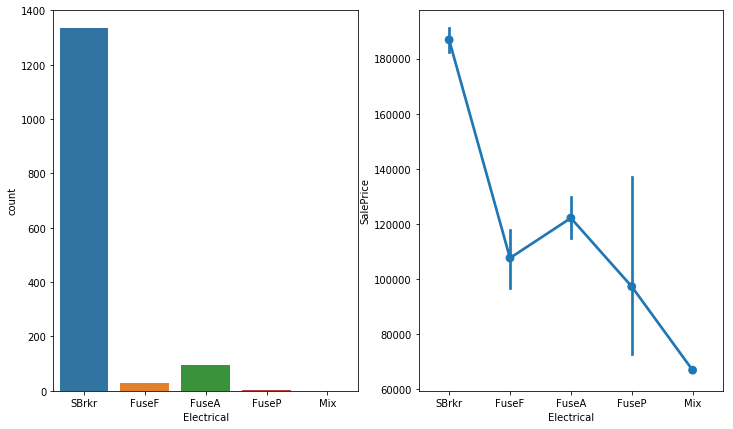

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,7))
sns.countplot(train_data['Electrical'],ax=ax1)
#print("Number of missing values",len(train_data[train_data['Electrical'].isnull()]))
sns.factorplot(x='Electrical',y="SalePrice",data=train_data,ax=ax2)
plt.close()

In [16]:
#lets see for missing values what is the SalePrice
print(train_data[train_data['Electrical'].isnull()])
#as we can see that sales price for missing values is 167500 which high. so as shown is plot above we will fill this missing values with "SBrkr
train_data['Electrical']=train_data['Electrical'].fillna('SBrkr')

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1379          80       RL         73.0     9735   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope    ...    PoolArea PoolQC Fence  \
1379    AllPub    Inside       Gtl    ...           0    NaN   NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
1379         NaN       0       5    2008        WD         Normal    167500  

[1 rows x 79 columns]


#### FireplaceQu

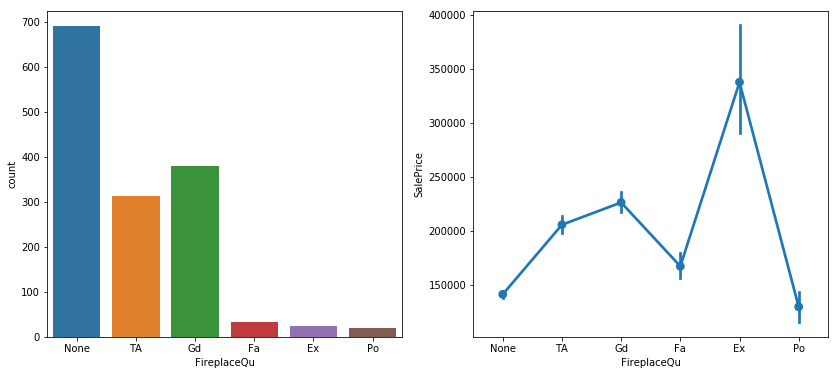

In [17]:
len(train_data[train_data['FireplaceQu'].isnull()])
# 690 values are missing , actually they are not missiing they null this means that no fireplace in the house
train_data["FireplaceQu"]=train_data['FireplaceQu'].fillna("None")
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,6))
sns.countplot(train_data['FireplaceQu'],ax=ax1)
sns.factorplot(x='FireplaceQu',y='SalePrice',data=train_data,ax=ax2)
plt.close()

so for 'Ex' the price is highest 

##### GarageYrBlt

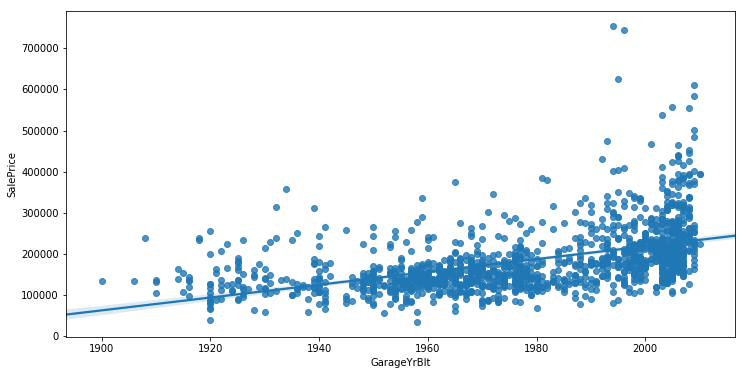

In [18]:
# Continuos Feature GarageYarBelt also has missing values
fig, (ax1)=plt.subplots(1,1,figsize=(12,6))
sns.regplot(x="GarageYrBlt",y="SalePrice",data=train_data,ax=ax1)

In [19]:
# Newer the garage better the price. for Nan in grageyrblt lets put 0 this means no garage
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(0)

##### GarageType,GarageFinish,GarageQual,GarageCond

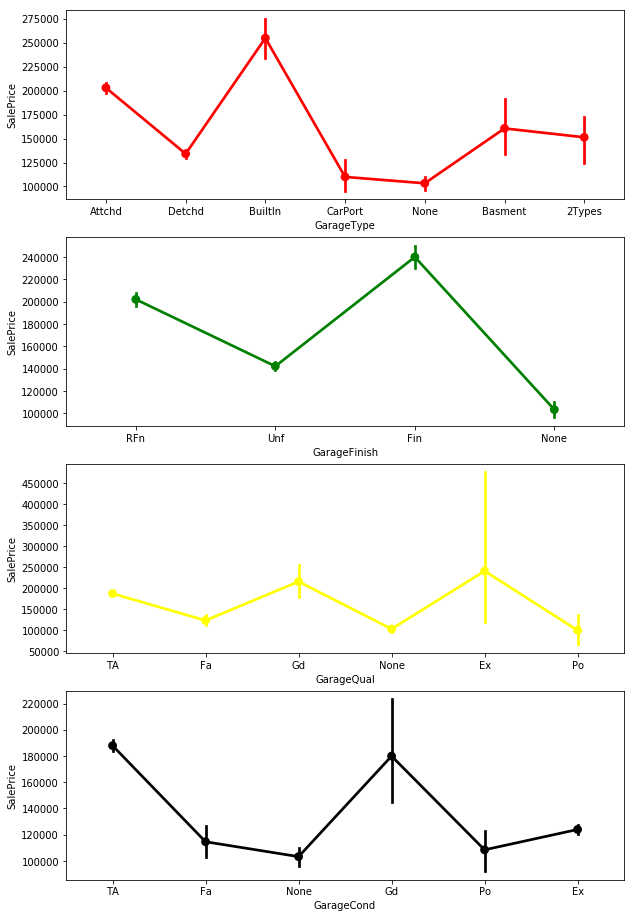

In [20]:
# not having garage means NaN, so filling this valuse with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_data[col] = train_data[col].fillna('None')
fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(10,16))
sns.factorplot(x='GarageType',y='SalePrice',data=train_data,ax=ax1,color='red')
sns.factorplot(x='GarageFinish',y='SalePrice',data=train_data,ax=ax2,color='green')
sns.factorplot(x='GarageQual',y='SalePrice',data=train_data,ax=ax3,color='yellow')
sns.factorplot(x='GarageCond',y='SalePrice',data=train_data,ax=ax4,color='black')
plt.close(4)
plt.close(3)
plt.close(2)
plt.close()

##### Pool

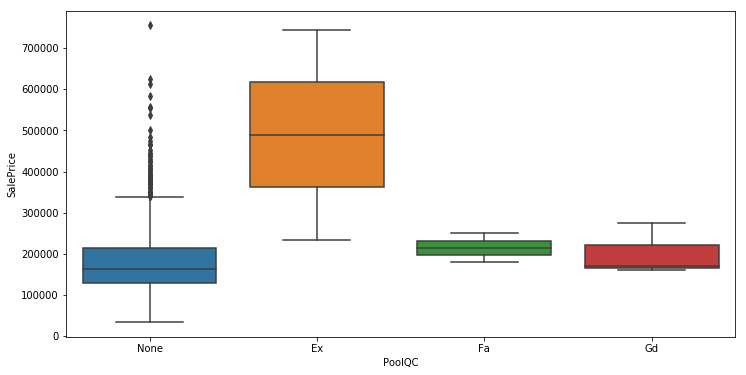

In [21]:
#no pool means this feature will have Nan
train_data["PoolQC"] = train_data["PoolQC"].fillna("None")
fig, (ax1)=plt.subplots(1,1,figsize=(12,6))
sns.boxplot(x='PoolQC',y='SalePrice',data=train_data,ax=ax1)

##### Fence

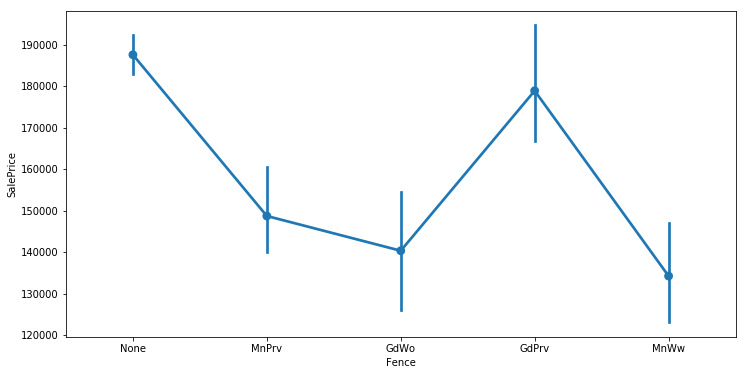

In [22]:
# nan means no fence
train_data["Fence"] = train_data["Fence"].fillna("None")
fig, (ax1)=plt.subplots(1,1,figsize=(12,6))
sns.factorplot(x='Fence',y='SalePrice',data=train_data,ax=ax1)
plt.close()

it looks like houses with no fences have higher prices but it may because these houses have higher valuse for some other features such pool

##### MiscFeatures

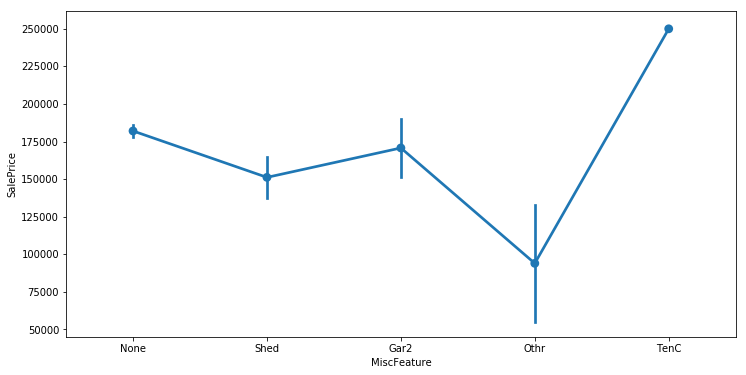

In [23]:
# no miscellenous features means Nan so we have done it earlier
train_data['MiscFeature']=train_data['MiscFeature'].fillna('None')
fig, (ax1)=plt.subplots(1,1,figsize=(12,6))
sns.factorplot(x='MiscFeature',y='SalePrice',data=train_data,ax=ax1)
plt.close()

looks like feature "TenC" is the costliest among all features

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

As we can see from above info that there is NaNs in our data set anymore so now we are ready to take next steps:

#### 3) Handling the Different type of feature- Categorical, Numerical

In [25]:
catgorical=[]
numeric=[]
for typ,col in zip(train_data.dtypes,train_data.columns):
    if(typ=='object'):
        catgorical.append(col)
    else:
        numeric.append(col)

In [26]:
print(catgorical)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


##### Lets Identify ordinal features in our dataset.


In [27]:
for feature in catgorical:
    print(feature,"-Unique values:",train_data[feature].unique())

('MSZoning', '-Unique values:', array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object))
('Street', '-Unique values:', array(['Pave', 'Grvl'], dtype=object))
('LotShape', '-Unique values:', array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object))
('LandContour', '-Unique values:', array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object))
('Utilities', '-Unique values:', array(['AllPub', 'NoSeWa'], dtype=object))
('LotConfig', '-Unique values:', array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object))
('LandSlope', '-Unique values:', array(['Gtl', 'Mod', 'Sev'], dtype=object))
('Neighborhood', '-Unique values:', array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object))
('Condition1', '-Unique values:', array(['Norm', 'Feedr', 'PosN',

##### from above output we can see that following features should be ordinal(categorical features where order matters) 

In [28]:
Ordinal_features=['LandSlop','ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','BsmtExposure']
Nominal_features=[]
for feature in catgorical:
    if feature in Ordinal_features:
        continue
    else:
        Nominal_features.append(feature)

##### Numeric Values to Ordinal Categorical Features

In [29]:
#LandSlop
print("before-Transformation",train_data["LandSlope"].unique())
train_data["LandSlope"] = train_data["LandSlope"].astype('category', ordered=True, categories=['Gt1', 'Mod', 'Sev']).cat.codes
print("After-Transformation",train_data["LandSlope"].unique())

('before-Transformation', array(['Gtl', 'Mod', 'Sev'], dtype=object))
('After-Transformation', array([-1,  1,  2]))


In [30]:
#ExterCond
print("before-Transformation",train_data["BsmtExposure"].unique())
#from below graph we can have an understanding that order in this feature is like"PO<FA<GD<TA<EX"
#lets do numeric transformation
train_data["BsmtExposure"] = train_data["BsmtExposure"].astype('category', ordered=True, categories=['None','No','Mn','Av','Gd']).cat.codes
print("After-Transformation",train_data["BsmtExposure"].unique())

('before-Transformation', array(['No', 'Gd', 'Mn', 'Av', 'None'], dtype=object))
('After-Transformation', array([1, 4, 2, 3, 0]))


In [31]:
Ordinal_features.pop(0)
Ordinal_features.pop(len(Ordinal_features)-1)

'BsmtExposure'

In [32]:
for feature in Ordinal_features:
    print("before-Transformation",feature,":",train_data[feature].unique())
    #from below graph we can have an understanding that order in this feature is like"PO<FA<GD<TA<EX"
    #lets do numeric transformation
    train_data[feature] = train_data[feature].astype('category', ordered=True, categories=['None','Po','Fa','TA','Gd','Ex']).cat.codes
    print("After-Transformation",train_data[feature].unique())
    

('before-Transformation', 'ExterQual', ':', array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object))
('After-Transformation', array([4, 3, 5, 2]))
('before-Transformation', 'ExterCond', ':', array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object))
('After-Transformation', array([3, 4, 2, 1, 5]))
('before-Transformation', 'BsmtQual', ':', array(['Gd', 'TA', 'Ex', 'None', 'Fa'], dtype=object))
('After-Transformation', array([4, 3, 5, 0, 2]))
('before-Transformation', 'BsmtCond', ':', array(['TA', 'Gd', 'None', 'Fa', 'Po'], dtype=object))
('After-Transformation', array([3, 4, 0, 2, 1]))
('before-Transformation', 'HeatingQC', ':', array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object))
('After-Transformation', array([5, 4, 3, 2, 1]))
('before-Transformation', 'KitchenQual', ':', array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object))
('After-Transformation', array([4, 3, 5, 2]))
('before-Transformation', 'FireplaceQu', ':', array(['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object))
('After-Transformation', array(

##### Numerical values to nominal categorical features Using get_dummies:

In [33]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,-1,...,0,0,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,-1,...,0,0,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,-1,...,0,0,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,-1,...,0,0,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,-1,...,0,0,None,None,0,12,2008,WD,Normal,250000


In [34]:
train_data=pd.get_dummies(train_data)

In [35]:
train_data.head()

,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,-1,7,5,2003,2003,196.0,4,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,-1,6,8,1976,1976,0.0,3,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,-1,7,5,2001,2002,162.0,4,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,-1,7,5,1915,1970,0.0,3,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,-1,8,5,2000,2000,350.0,4,...,0,0,0,1,0,0,0,0,1,0


##### In order to make sure that our input features are independent we need to delete 1 dummy feature created for categrical features (avoding dummpy variable trap http://www.algosome.com/articles/dummy-variable-trap-regression.html )

In [36]:
train_data.drop(['MSZoning_FV','Street_Grvl','LotShape_IR1','LandContour_Bnk','Utilities_AllPub','LotConfig_Corner','Neighborhood_BrDale','Condition1_Artery','Condition2_Norm','BldgType_1Fam','HouseStyle_1.5Fin','RoofStyle_Flat','RoofMatl_ClyTile','Exterior1st_AsbShng','Exterior2nd_Other','MasVnrType_None','Foundation_Slab','BsmtFinType1_ALQ','BsmtFinType2_ALQ','Heating_Floor','CentralAir_N','Electrical_FuseA','Functional_Maj1','GarageType_2Types','GarageFinish_Fin','PavedDrive_N','Fence_GdPrv','MiscFeature_Gar2','SaleType_COD','SaleCondition_Abnorml'], inplace=True, axis=1)
train_data.head()

,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,-1,7,5,2003,2003,196.0,4,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,-1,6,8,1976,1976,0.0,3,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,-1,7,5,2001,2002,162.0,4,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,-1,7,5,1915,1970,0.0,3,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,-1,8,5,2000,2000,350.0,4,...,0,0,0,0,1,0,0,0,1,0


##### Now Lets have a look at our Numerical Features :

In [37]:
for x in numeric:
    print(x,"   :",len(train_data[x].unique()))

('MSSubClass', '   :', 15)
('LotFrontage', '   :', 110)
('LotArea', '   :', 1073)
('OverallQual', '   :', 10)
('OverallCond', '   :', 9)
('YearBuilt', '   :', 112)
('YearRemodAdd', '   :', 61)
('MasVnrArea', '   :', 327)
('BsmtFinSF1', '   :', 637)
('BsmtFinSF2', '   :', 144)
('BsmtUnfSF', '   :', 780)
('TotalBsmtSF', '   :', 721)
('1stFlrSF', '   :', 753)
('2ndFlrSF', '   :', 417)
('LowQualFinSF', '   :', 24)
('GrLivArea', '   :', 861)
('BsmtFullBath', '   :', 4)
('BsmtHalfBath', '   :', 3)
('FullBath', '   :', 4)
('HalfBath', '   :', 3)
('BedroomAbvGr', '   :', 8)
('KitchenAbvGr', '   :', 4)
('TotRmsAbvGrd', '   :', 12)
('Fireplaces', '   :', 4)
('GarageYrBlt', '   :', 98)
('GarageCars', '   :', 5)
('GarageArea', '   :', 441)
('WoodDeckSF', '   :', 274)
('OpenPorchSF', '   :', 202)
('EnclosedPorch', '   :', 120)
('3SsnPorch', '   :', 20)
('ScreenPorch', '   :', 76)
('PoolArea', '   :', 8)
('MiscVal', '   :', 21)
('MoSold', '   :', 12)
('YrSold', '   :', 5)
('SalePrice', '   :', 663)


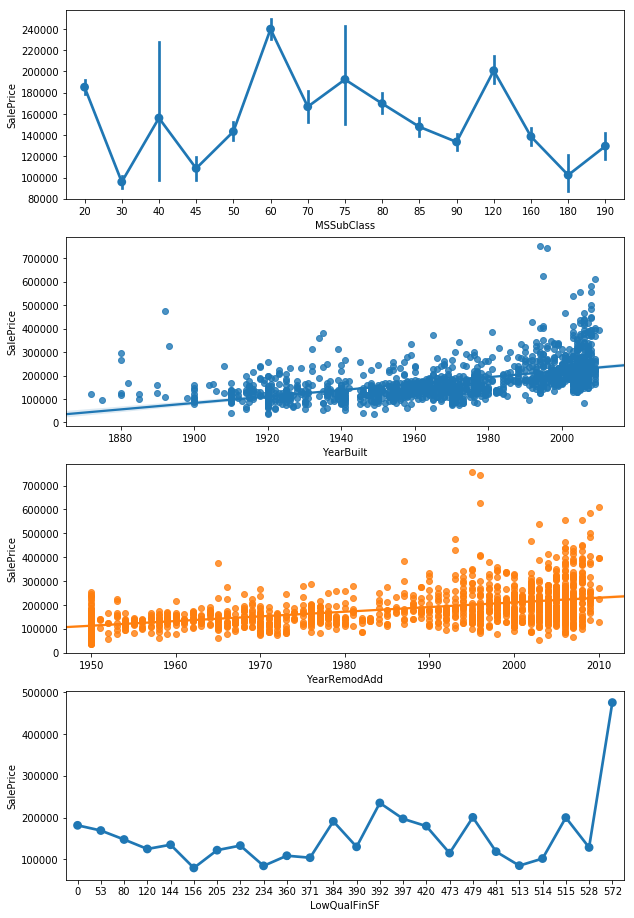

In [38]:
# not having garage means NaN, so filling this valuse with None
fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(10,16))
sns.regplot(x="YearBuilt",y="SalePrice",data=train_data,ax=ax2)
sns.regplot(x="YearRemodAdd",y="SalePrice",data=train_data,ax=ax3)
sns.factorplot(x='MSSubClass',y='SalePrice',data=train_data,ax=ax1)
sns.factorplot(x='LowQualFinSF',y='SalePrice',data=train_data,ax=ax4)

plt.close(3)
plt.close(2)


##### from above graphs we can understand that there are numerical features which are acually categorical features. lets convert them to original form

In [39]:
# Categorical Features which were earlier being treated are numerical features:
# Mssubclass,BsmtFullBath,BsmtHalfBath,fullbath, halfbath ,
#BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd',Fireplaces',GarageCars,3SsnPorch,PoolArea,MiscVal,YrSold

train_data['MSSubClass'] = train_data['MSSubClass'].apply(str)
train_data['BsmtFullBath'] = train_data['BsmtFullBath'].apply(str)
train_data['BsmtHalfBath'] = train_data['BsmtHalfBath'].apply(str)
train_data['FullBath'] = train_data['FullBath'].apply(str)
train_data['HalfBath'] = train_data['HalfBath'].apply(str)
train_data['BedroomAbvGr'] = train_data['BedroomAbvGr'].apply(str)
train_data['KitchenAbvGr'] = train_data['KitchenAbvGr'].apply(str)
train_data['TotRmsAbvGrd'] = train_data['TotRmsAbvGrd'].apply(str)
train_data['Fireplaces'] = train_data['Fireplaces'].apply(str)
train_data['GarageCars'] = train_data['GarageCars'].apply(str)
train_data['3SsnPorch'] = train_data['3SsnPorch'].apply(str)
train_data['MiscVal'] = train_data['MiscVal'].apply(str)
train_data['PoolArea'] = train_data['PoolArea'].apply(str)
train_data['YrSold'] = train_data['YrSold'].apply(str)
train_data=pd.get_dummies(train_data)
train_data.head()
#

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,MiscVal_600,MiscVal_620,MiscVal_700,MiscVal_800,MiscVal_8300,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,65.0,8450,-1,7,5,2003,2003,196.0,4,3,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,-1,6,8,1976,1976,0.0,3,3,...,0,0,0,0,0,0,1,0,0,0
2,68.0,11250,-1,7,5,2001,2002,162.0,4,3,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,-1,7,5,1915,1970,0.0,3,3,...,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,-1,8,5,2000,2000,350.0,4,3,...,0,0,0,0,0,0,0,1,0,0


In [40]:
train_data.drop(['MSSubClass_120','BsmtFullBath_0','BsmtHalfBath_0','FullBath_0','HalfBath_0','BedroomAbvGr_0','KitchenAbvGr_0','TotRmsAbvGrd_10','Fireplaces_0','GarageCars_0','3SsnPorch_0','MiscVal_0','YrSold_2006','PoolArea_0'], inplace=True, axis=1)
train_data.head()

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,MiscVal_560,MiscVal_600,MiscVal_620,MiscVal_700,MiscVal_800,MiscVal_8300,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,65.0,8450,-1,7,5,2003,2003,196.0,4,3,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,-1,6,8,1976,1976,0.0,3,3,...,0,0,0,0,0,0,1,0,0,0
2,68.0,11250,-1,7,5,2001,2002,162.0,4,3,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,-1,7,5,1915,1970,0.0,3,3,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,-1,8,5,2000,2000,350.0,4,3,...,0,0,0,0,0,0,0,1,0,0


In [50]:
temp=train_data['SalePrice']
del train_data['SalePrice']

#### 4) Fit Model & Evaluate the performance       

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn import linear_model
y=np.array(temp.values)
X=np.array(train_data.values)
X=scale(X)
lasso_error=[]
ridge_error=[]

for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    
    #Lasso
    lasso = linear_model.Lasso(alpha=100)
    lasso.fit(X_train,y_train)
    lasso_pred=lasso.predict(X_test)
    
    #Ridge    
    ridge = linear_model.Ridge(alpha=100)
    ridge.fit(X_train,y_train)
    ridge_pred=ridge.predict(X_test)
    
    lasso_error.append(np.sqrt(mean_squared_error(y_test,lasso_pred)))
    ridge_error.append(np.sqrt(mean_squared_error(y_test,ridge_pred)))
    
print("Lasso_error:",np.mean(lasso_error))
print("Ridge_error:",np.mean(ridge_error))

('Lasso_error:', 28748.947157977847)
('Ridge_error:', 28342.165964187392)
